In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib inline
import sklearn.decomposition as skde

In [2]:
df = pd.read_csv('ncaa_matches_binned.csv')
df.drop(df.columns[0], axis=1, inplace=True)
#NOTE: if you dont drop these two attributes below the pca will only show these two as the most important attributes
df.drop('Team1', axis=1, inplace=True)
df.drop('Team2', axis=1, inplace=True)
print(' done')

 done


In [3]:
print(df.shape)
df.head()

(87504, 29)


,Team1Score,Team1FGM,Team1FGA,Team1FGM3,Team1FGA3,Team1FTM,Team1FTA,Team1OR,Team1DR,Team1Ast,...,Team2FTM,Team2FTA,Team2OR,Team2DR,Team2Ast,Team2TO,Team2Stl,Team2Blk,Team2PF,Win
0,2,2,2,0,1,2,1,1,2,3,...,3,3,3,3,1,0,2,2,1,1.0
1,1,1,1,0,0,2,2,1,3,2,...,3,3,3,3,3,3,1,3,0,0.0
2,3,3,3,1,1,3,3,3,3,3,...,2,2,0,2,3,2,1,2,1,0.0
3,3,3,2,3,2,2,0,0,3,3,...,2,1,2,0,0,0,2,0,3,0.0
4,2,2,2,0,0,2,1,1,3,3,...,2,2,2,3,3,3,1,3,0,1.0


In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df2 = pd.DataFrame(df.select_dtypes(include=numerics))

df2 = df2.dropna() 
print(df2.shape)
df2.head()

(87504, 29)


,Team1Score,Team1FGM,Team1FGA,Team1FGM3,Team1FGA3,Team1FTM,Team1FTA,Team1OR,Team1DR,Team1Ast,...,Team2FTM,Team2FTA,Team2OR,Team2DR,Team2Ast,Team2TO,Team2Stl,Team2Blk,Team2PF,Win
0,2,2,2,0,1,2,1,1,2,3,...,3,3,3,3,1,0,2,2,1,1.0
1,1,1,1,0,0,2,2,1,3,2,...,3,3,3,3,3,3,1,3,0,0.0
2,3,3,3,1,1,3,3,3,3,3,...,2,2,0,2,3,2,1,2,1,0.0
3,3,3,2,3,2,2,0,0,3,3,...,2,1,2,0,0,0,2,0,3,0.0
4,2,2,2,0,0,2,1,1,3,3,...,2,2,2,3,3,3,1,3,0,1.0


In [5]:
pca_mod = skde.PCA()
pca_comps = pca_mod.fit(df2)
pca_comps

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
print(pca_comps.explained_variance_ratio_)
print(np.sum(pca_comps.explained_variance_ratio_))

[0.19168362 0.12656954 0.12325191 0.07632137 0.06552361 0.05724952
 0.05067413 0.03890607 0.02954443 0.02754262 0.02496989 0.02286268
 0.02038317 0.01891199 0.01719543 0.01425382 0.01419576 0.01274312
 0.0112019  0.01082253 0.00731992 0.00723632 0.00632103 0.00547586
 0.0054285  0.00346458 0.00340188 0.00334424 0.00320056]
1.0


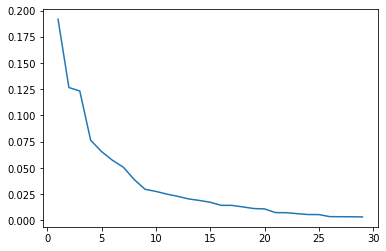

In [7]:
def plot_explained(mod):
    comps = mod.explained_variance_ratio_
    x = range(len(comps))
    x = [y + 1 for y in x]          
    plt.plot(x,comps)

plot_explained(pca_comps)

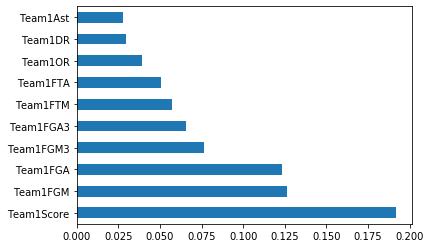

In [10]:
(pd.Series(pca_comps.explained_variance_ratio_, index=df2.columns)
   .nlargest(10)
   .plot(kind='barh')) 

In [ ]:
'Team1Score', 'Team1FGM', 'Team1FGA', 'Team1FGM3', 'Team1FGA3', 'Team1FTM', 'Team1FTA', 'Team1OR', 'Team1DR', 'Team1AST'